In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import argparse
import imutils
import glob
from imutils.object_detection import non_max_suppression



(182, 199, 3)


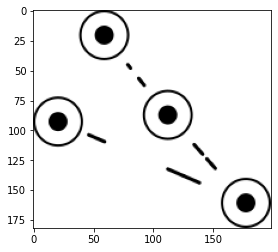

In [29]:
img = cv2.imread("punchline2.png")
plt.imshow(img)
print(img.shape)


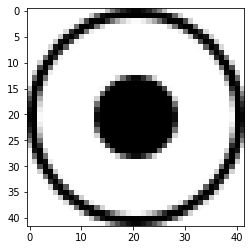

In [30]:
template = cv2.imread("template.png")
plt.imshow(template)
(tH, tW) = template.shape[:2]
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

[INFO] 11 matched locations *before* NMS
No of template matched locations 11


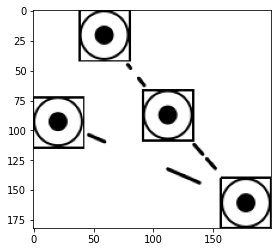

In [31]:

result = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
(yCoords, xCoords) = np.where(result >= 0.8)
number_of_templates_matched = 0
clone = img.copy()
print("[INFO] {} matched locations *before* NMS".format(len(yCoords)))
for (x, y) in zip(xCoords, yCoords):
    	# draw the bounding box on the image
	cv2.rectangle(clone, (x, y), (x + tW, y + tH),
		(0), 1)
	number_of_templates_matched = number_of_templates_matched + 1

print("No of template matched locations",number_of_templates_matched)
plt.imshow(clone,cmap="gray")


[INFO] 4 matched locations *after* NMS
[(178.0, 161.0), (21.0, 94.0), (113.0, 88.0), (60.0, 21.0)] shape of image (182, 199)


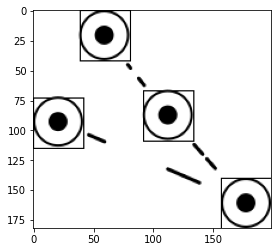

In [32]:
rects = []
clone2 = img.copy()
# loop over the starting (x, y)-coordinates again
for (x, y) in zip(xCoords, yCoords):
	# update our list of rectangles
	rects.append((x, y, x + tW, y + tH))
# apply non-maxima suppression to the rectangles
pick = non_max_suppression(np.array(rects))
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
centers = [ ]
temp = ()
for (startX, startY, endX, endY) in pick:
	# draw the bounding box on the image
	cv2.rectangle(clone2, (startX, startY), (endX, endY),
		(0), 1)
	temp = ((startX+endX)/2, (startY+endY)/2)
	centers.append(temp)

# show the output image
plt.imshow(clone2,cmap="gray")
print(centers,"shape of image",img.shape)

# perspective transforming two pairs

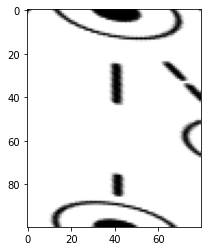

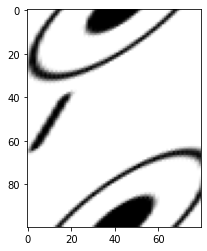

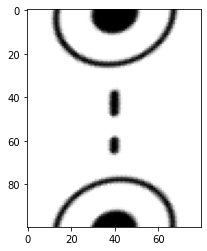

In [33]:
clone3 = img.copy()
perspective_frame = (80,100)
perspective_images = []
# (startX, startY, endX, endY)
for i in range(len(pick)-1):

    pts1 = np.float32([[pick[i][0],pick[i][3]],[pick[i][2],pick[i][1]],[pick[i+1][0],pick[i+1][3]],[pick[i+1][2],pick[i+1][1]]])
    pts2 = np.float32([[0,0],[perspective_frame[0],0],[0,perspective_frame[1]],[perspective_frame[0],perspective_frame[1]]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(clone3,M,perspective_frame)
    perspective_images.append(dst)
    plt.figure()

    plt.imshow(dst,cmap="gray")
  

plt.show()


In [34]:
perspective_images[0].shape

(100, 80)